# MNIST 数字识别

In [1]:
import torch
import torch.nn
import torch.optim
import torchvision.datasets
import torchvision.transforms
import torch.utils.data

读取数据

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data/mnist',
        train=True, transform=torchvision.transforms.ToTensor(),
        download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/mnist',
        train=False, transform=torchvision.transforms.ToTensor(),
        download=True)

Processing...
Done!


In [3]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset, batch_size=batch_size)
print('len(train_loader) = {}'.format(len(train_loader)))
test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset, batch_size=batch_size)
print('len(test_loader) = {}'.format(len(test_loader)))

for images, labels in train_loader:
    print ('image.size() = {}'.format(images.size()))
    print ('labels.size() = {}'.format(labels.size()))
    break

len(train_loader) = 600
len(test_loader) = 100
image.size() = torch.Size([100, 1, 28, 28])
labels.size() = torch.Size([100])


Text(0.5,1,'label = 5')

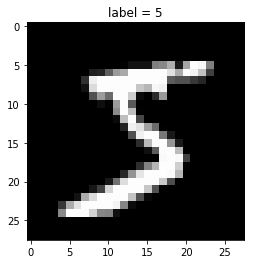

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images[0, 0], cmap='gray')
plt.title('label = {}'.format(labels[0]))

训练

In [5]:
fc = torch.nn.Linear(28 * 28, 10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fc.parameters()) 

num_epochs = 5
for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader):
        x = images.reshape(-1, 28*28)
        
        optimizer.zero_grad()
        preds = fc(x)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        
        if idx % 100 == 0:
            print('第{}趟第{}批：loss = {:g}'.format(epoch, idx, loss))

第0趟第0批：loss = 2.30195
第0趟第100批：loss = 0.752388
第0趟第200批：loss = 0.688536
第0趟第300批：loss = 0.567242
第0趟第400批：loss = 0.405684
第0趟第500批：loss = 0.438673
第1趟第0批：loss = 0.336651
第1趟第100批：loss = 0.349938
第1趟第200批：loss = 0.426128
第1趟第300批：loss = 0.35121
第1趟第400批：loss = 0.3013
第1趟第500批：loss = 0.366111
第2趟第0批：loss = 0.269673
第2趟第100批：loss = 0.302057
第2趟第200批：loss = 0.361562
第2趟第300批：loss = 0.297809
第2趟第400批：loss = 0.273201
第2趟第500批：loss = 0.341415
第3趟第0批：loss = 0.239015
第3趟第100批：loss = 0.282269
第3趟第200批：loss = 0.327436
第3趟第300批：loss = 0.27465
第3趟第400批：loss = 0.260817
第3趟第500批：loss = 0.327343
第4趟第0批：loss = 0.221851
第4趟第100批：loss = 0.272043
第4趟第200批：loss = 0.305498
第4趟第300批：loss = 0.261793
第4趟第400批：loss = 0.25385
第4趟第500批：loss = 0.317882


测试

In [6]:
correct = 0
total = 0
for images, labels in test_loader:
    x = images.reshape(-1, 28 * 28)
    preds = fc(x)
    predicted = torch.argmax(preds, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
accuracy = correct / total
print('测试集上的准确率：{:.1%}'.format(accuracy))

测试集上的准确率：92.2%
